In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as dates
plt.rcParams['font.family'] = 'SimHei'
from igraph import *
import pickle
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
usecols = ["stat_date", "uid", "onlinetime", "level", "upvote","onlinetime_list","corpid", "carteamid", "vclientip","country",
            "friend_num_plat", "friend_list_plat", "active_plat_num", "friend_num_game","friend_list_game", "active_game_num", "jiyounum", "lianrennum", "sidangnum", "guiminum",
            "jiyou", "lianren", "sidang", "guimi", "chg_intimacy", "avg_intimacy", "gender", "chat_num", "friend_chat_num", "send_gold_num",
            "draw_gold_num", "vote_num", "friend_vote_num", "give_gift_num", "get_gift_num", "recruit_num", "friend_recruit_num", 
            "reply_recruit_num", "team_num", "leader_team_num", "invite_team_num", "apply_relation_num", "reply_relation_num",
            "del_friend_num", "invite_carteam_num", "friend_carteam_num", "carteam_leaader_num", "accept_carteam_num", "corps_active_change",
            "uid_corp_active_change", "corps_level_change", "suc_match_num", "create_corp_num", "signup_num", "achievement_num", 
            "chat_uid_num", "friend_uid_num", "reject_friend_num", "del_friend_apply_num", "reject_relation_num", "del_intimacy_num",
            "exit_carteam_num", "kick_num", "bekick_num", "del_carteam_num", "transfer_carteam_num", "accept_invite_team_num",
            "reject_invite_team_num", "beaccept_invite_team_num", "bereject_invite_team_num", "beaccept_apply_team_num", 
            "bereject_apply_team_num", "accept_apply_team_num", "reject_apply_team_num", "join_corp_num", "space_req_num",
            "space_bereq_num", "space_gift_num", "space_gift_unum", "login_num", "login_days", "is_comeback", "playerlang", 
            "onlinetime_detail", "bevote_num", "corp_money_chg", "funny_mode_num", "funny_single_num", "funny_double_num", "funny_squad_num",
            "round_num", "avg_kill_count", "avg_hit_rate", "chicken_rate", "top10_rate", "avg_damage", "avg_box_num", "avg_survivaltime",
            "avg_moving", "head_shoot_rate", "avg_gun_kill", "avg_assist", "avg_healtimes", "avg_healamount", "avg_cure",
            "round_single_num", "round_double_num", "round_squad_num", "first_single_segment", "first_dou_segment", "first_squad_segment",
            "third_single_segment", "third_dou_segment", "third_squad_segment", "first_single_score", "first_dou_score", "first_squad_score", 
            "third_single_score", "third_dou_score", "third_squad_score", "systemhardware", "platid", "diamond_add_4week", "register_days", 
            "content_sample", "ratingvalueafterchanged", "final_score", "diamond_add", "diamond_reduce_4week", "diamond_reduce", 
            "classical_num", "funny_num", "tpp_num", "fpp_num", "solo_num", "duo_num", "squad_num", "funny_quick_num","funny_sniper_num",
            "funny_war_num", "segment", "classical_team_rate",  "avg_collectindex", "avg_fps",
            "funny_team_rate", "is_register_month", "last_login_date", "avg_hit_distance", "reward_num", "share_num", "register_time", 
            "is_etc", "is_vpn", "daily_buy_num", "game_start_num", "skin_num"
]
len(usecols)

156

In [3]:
personal = ["onlinetime", "level", "upvote","signup_num", "achievement_num","login_num", "login_days", "round_num",
            "round_squad_num","segment", "reward_num", "skin_num"]
relations = [ "friend_num_plat", "active_plat_num", "friend_num_game","active_game_num", "chat_num", "friend_chat_num",
            "send_gold_num", "draw_gold_num", "vote_num", "friend_vote_num","recruit_num", "friend_recruit_num", 
            "reply_recruit_num","team_num", "leader_team_num", "invite_team_num", "apply_relation_num", "reply_relation_num",
            "del_friend_num","reject_friend_num", "del_friend_apply_num", "reject_relation_num", "del_intimacy_num", "accept_invite_team_num",
            "reject_invite_team_num", "beaccept_invite_team_num", "bereject_invite_team_num", "beaccept_apply_team_num", 
            "bereject_apply_team_num", "accept_apply_team_num", "reject_apply_team_num"]
performance = ["avg_kill_count", "avg_hit_rate", "chicken_rate", "top10_rate", "avg_damage", "avg_box_num", "avg_survivaltime",
            "avg_moving", "head_shoot_rate", "avg_gun_kill", "avg_assist", "avg_healtimes", "avg_healamount", "avg_cure","avg_hit_distance",
              "final_score"]

In [4]:
date_list = ["0607", "0614", "0621", "0628", "0705", "0712", "0719", "0726"] # 数据文件的日期

In [5]:
steal_account_by_dates = []
for date in date_list: 
    steal_account =  pd.read_csv("2021" + date + "_steal_fea_data.txt", sep="\t",
                                dtype={"stat_date":str, "uid":str,"corpid":str, "carteamid":str, 
                                       "friend_list_game":str, "friend_list_plat":str, 
                                       "jiyou":str,"lianren":str,"sidang":str,"guimi":str,
                                      "register_time":str, "last_login_date":str}, 
                                usecols= usecols,
                               na_values=['-1', '\\N'])
    print(steal_account.shape)
    steal_account.drop(np.where(steal_account["uid"].apply(type) != str )[0], inplace=True)
    steal_account = steal_account[np.logical_not(steal_account["uid"].duplicated())]
    print(date, steal_account.shape)
    steal_account_by_dates.append(steal_account)
    del(steal_account)

c:\users\zhixuanshao\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(54873, 156)
0607 (54627, 156)
(55200, 156)
0614 (54953, 156)
(55329, 156)
0621 (55084, 156)
(56652, 156)
0628 (56409, 156)
(57116, 156)
0705 (56876, 156)
(56856, 156)
0712 (56618, 156)
(55624, 156)
0719 (55388, 156)
(54208, 156)
0726 (53982, 156)


In [6]:
shared_uid = steal_account_by_dates[0]["uid"]
for df in steal_account_by_dates[1:]:
    shared_uid = np.intersect1d(shared_uid, df["uid"], assume_unique=True)
print(len(shared_uid)) # 每个日期内都有记录的玩家数

44226


In [7]:
shared_uid_0607_0628_0726 = steal_account_by_dates[0]["uid"]
for i in [0,3,7]:
    shared_uid_0607_0628_0726 = np.intersect1d(shared_uid_0607_0628_0726, steal_account_by_dates[i]["uid"], assume_unique=True)
print(len(shared_uid_0607_0628_0726)) # 在06/07, 06/28, 07/26这三个日期内又记录的玩家数

47036


In [8]:
for i in range(len(steal_account_by_dates)):
    steal_account_by_dates[i].set_index("uid", inplace=True)

# 特征均值纵向变化（全体被盗账号）

In [ ]:
import json
with open('giant_cluster_within_steal_0628.json', 'r') as f:
    giant_cluster_within_steal_0628 = np.array(json.load(f))

44226 1351


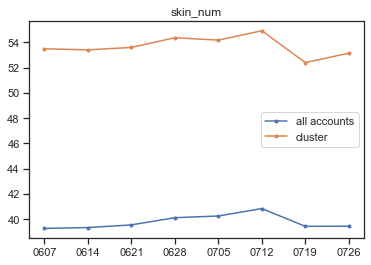

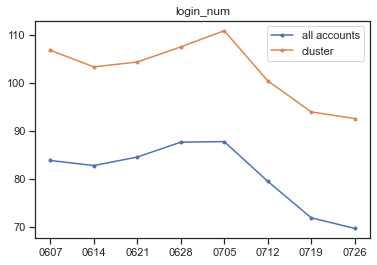

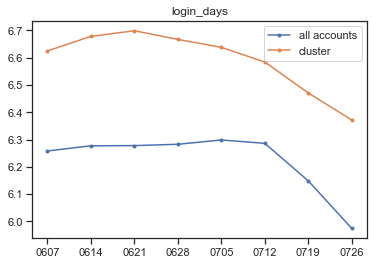

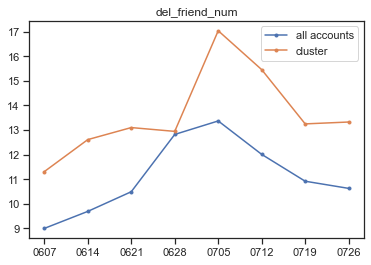

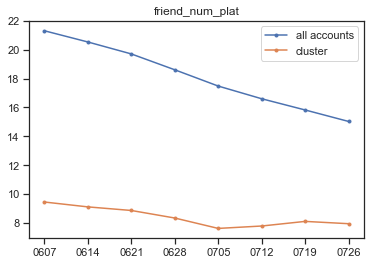

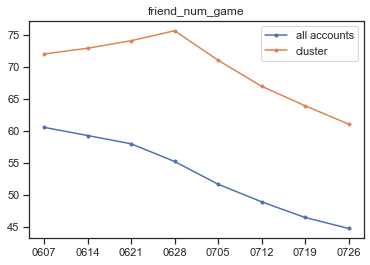

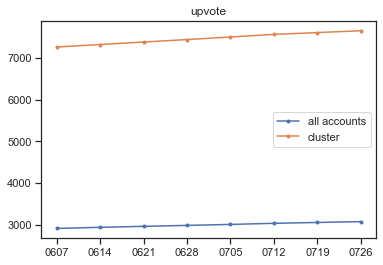

In [85]:
shared_uid_cluster = np.intersect1d(shared_uid,giant_cluster_within_steal_0628)
print(len(shared_uid), len(shared_uid_cluster))
for feature in ["skin_num", "login_num", "login_days", "del_friend_num", "friend_num_plat", "friend_num_game", "upvote"]:
    plt.plot(date_list, [steal_account[feature][shared_uid].mean() for steal_account in steal_account_by_dates], ".-",
            label = "all accounts")
    plt.plot(date_list, [steal_account[feature][shared_uid_cluster].mean() for steal_account in steal_account_by_dates], ".-",
            label = "cluster")
    plt.title(feature)
    plt.legend()
    plt.savefig("longitudinal_"+feature + ".png")
    plt.show()

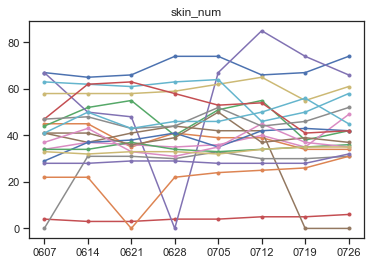

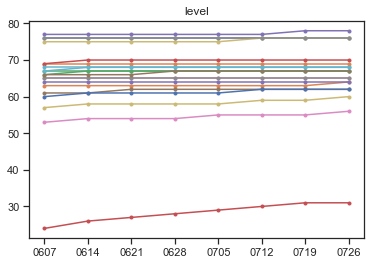

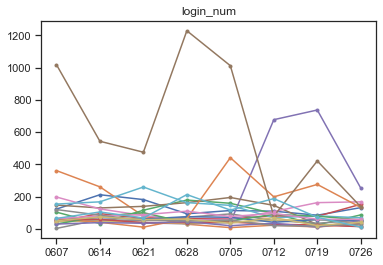

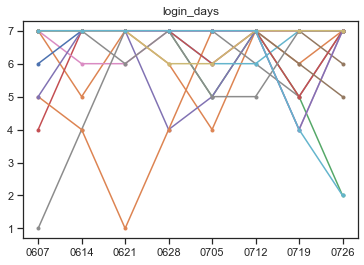

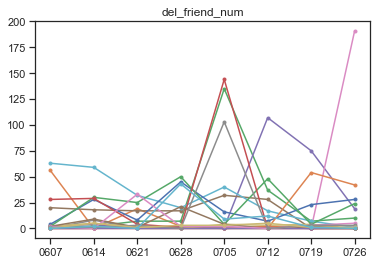

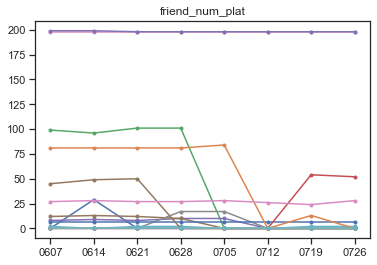

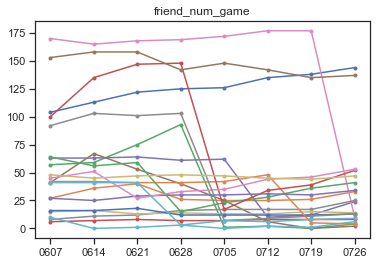

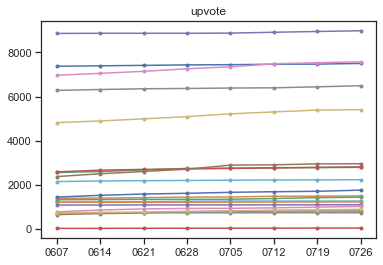

In [67]:
shared_uid_subsample = np.random.choice(shared_uid,20)
for feature in ["skin_num","level",  "login_num", "login_days", "del_friend_num", "friend_num_plat", "friend_num_game", "upvote"]:
    for uid in shared_uid_subsample:
        feature_by_dates = [steal_account[feature][uid] for steal_account in steal_account_by_dates]
        plt.plot(date_list, feature_by_dates, ".-")
    plt.title(feature)
    plt.show()

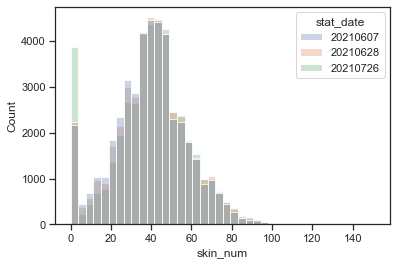

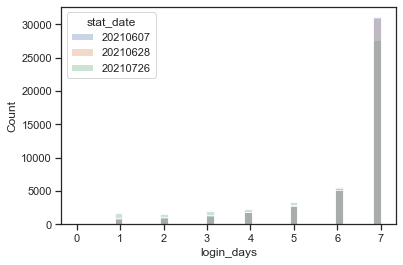

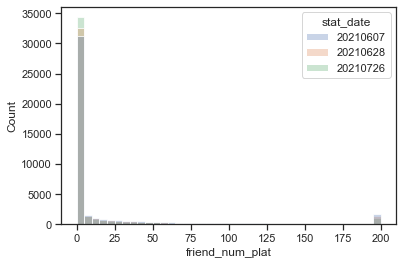

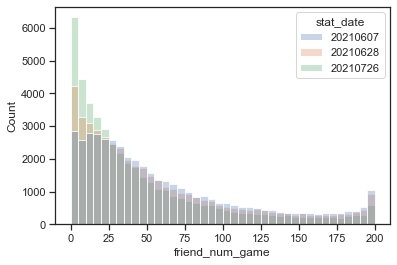

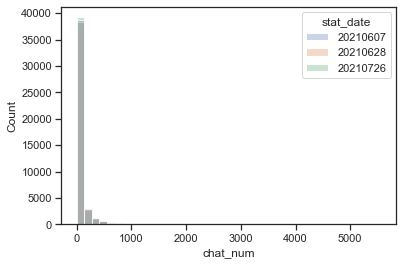

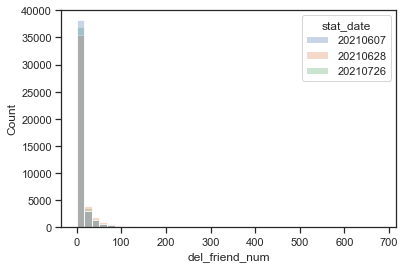

In [15]:
for feature in ["skin_num", "login_days", "friend_num_plat", "friend_num_game", "chat_num", "del_friend_num"]:
    sns.histplot(data = pd.concat([steal_account_by_dates[i].loc[shared_uid] for i in [0,3,7]]), x = feature, hue = "stat_date",
                 bins = 40, alpha = 0.3)
    plt.savefig("hist_comparison_all_accounts_" + feature + ".png")
    plt.show()

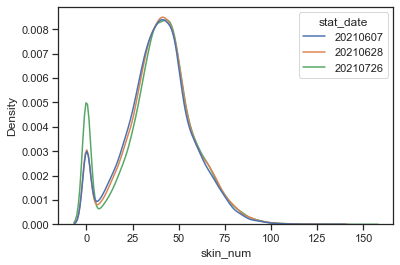

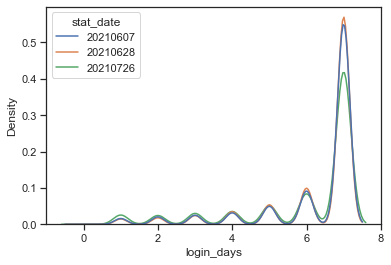

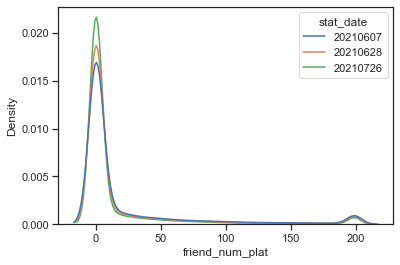

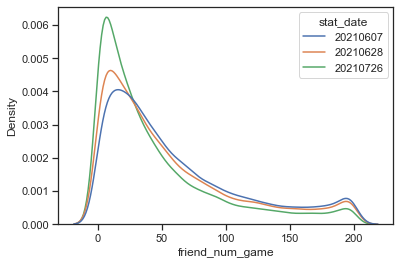

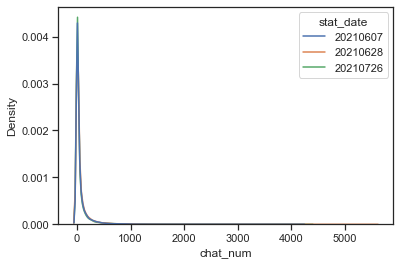

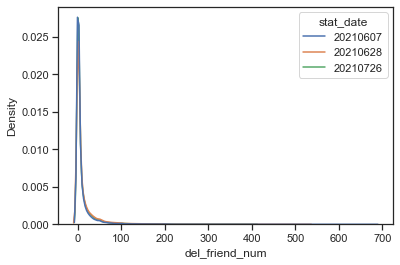

In [14]:
for feature in ["skin_num", "login_days", "friend_num_plat", "friend_num_game", "chat_num", "del_friend_num"]:
    sns.kdeplot(data = pd.concat([steal_account_by_dates[i].loc[shared_uid] for i in [0,3,7]]), x = feature, hue = "stat_date")
    plt.savefig("kde_comparison_all_accounts_" + feature + ".png")
    plt.show()

# 特征均值纵向变化（盗号团伙）

1351


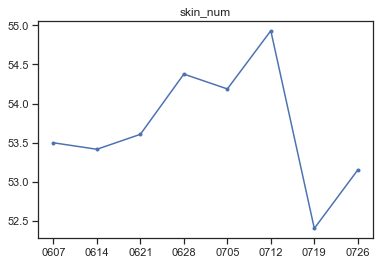

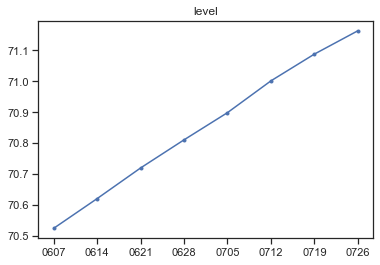

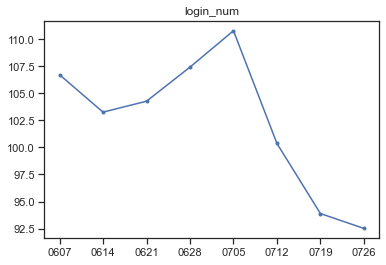

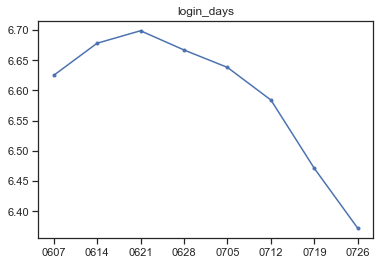

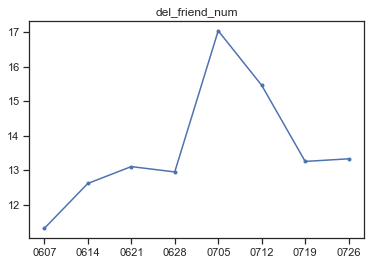

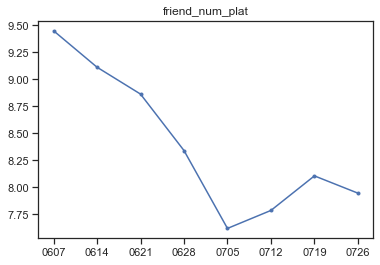

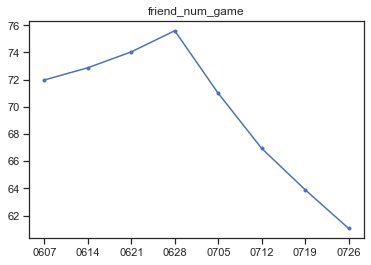

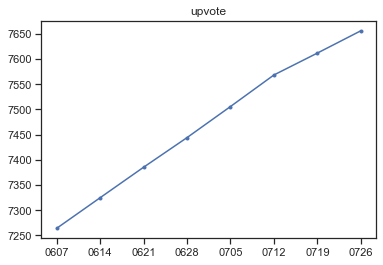

In [60]:
for feature in ["skin_num","level",  "login_num", "login_days", "del_friend_num", "friend_num_plat", "friend_num_game", "upvote"]:
    feature_mean_by_dates = [steal_account[feature][shared_uid_cluster].mean() for steal_account in steal_account_by_dates]
    plt.plot(date_list, feature_mean_by_dates, ".-")
    plt.title(feature)
    plt.show()

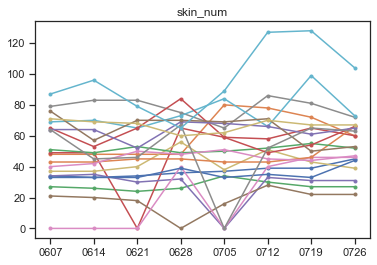

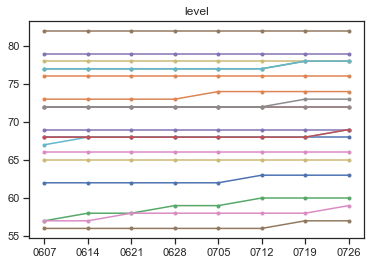

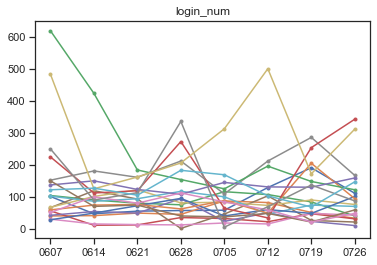

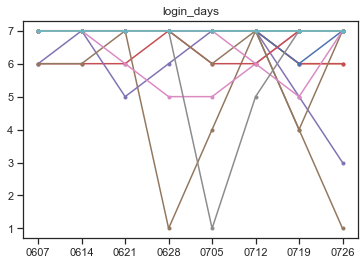

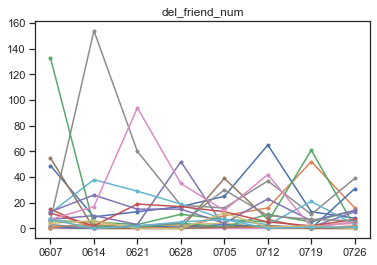

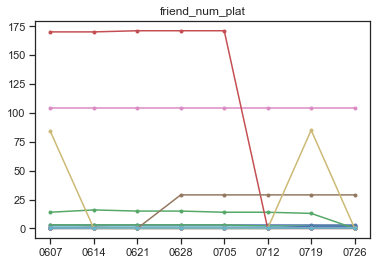

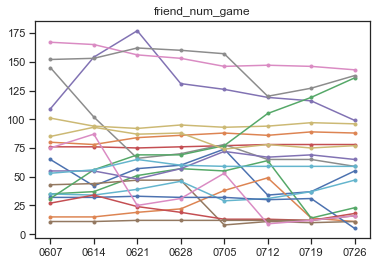

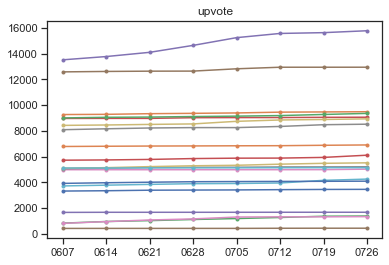

In [68]:
shared_uid_cluster_subsample = np.random.choice(shared_uid_cluster,20)
for feature in ["skin_num","level",  "login_num", "login_days", "del_friend_num", "friend_num_plat", "friend_num_game", "upvote"]:
    for uid in shared_uid_cluster_subsample:
        feature_by_dates = [steal_account[feature][uid] for steal_account in steal_account_by_dates]
        plt.plot(date_list, feature_by_dates, ".-")
    plt.title(feature)
    plt.show()

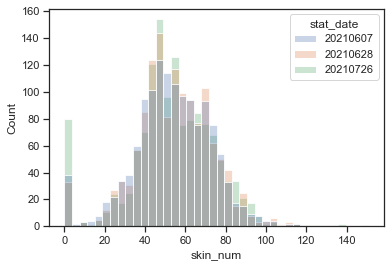

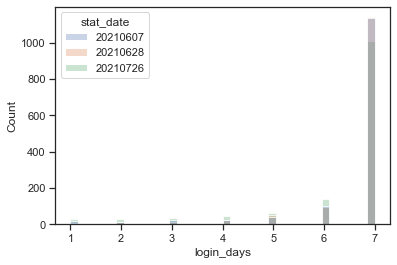

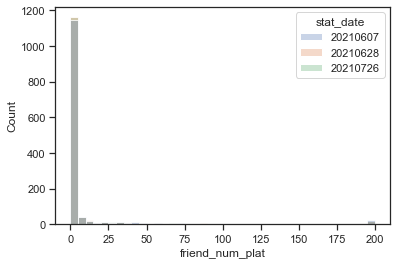

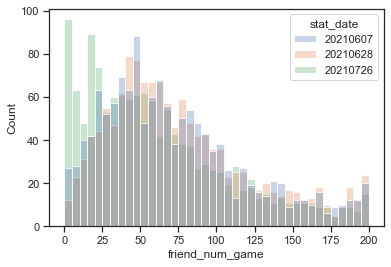

In [89]:
for feature in ["skin_num", "login_days", "friend_num_plat", "friend_num_game"]:
    sns.histplot(data = pd.concat([steal_account_by_dates[i].loc[shared_uid_cluster] for i in [0,3,7]]), x = feature, hue = "stat_date",
                 bins = 40, alpha = 0.3)
    plt.savefig("hist_comparison_cluster_" + feature + ".png")
    plt.show()

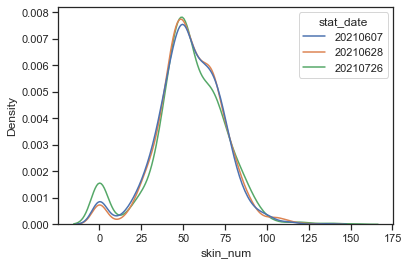

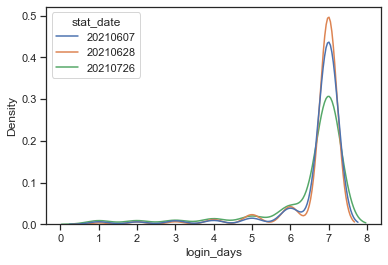

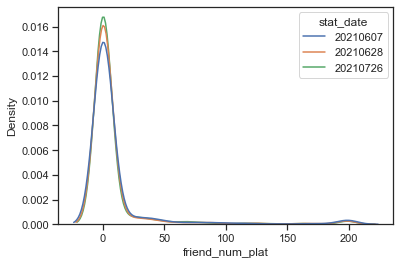

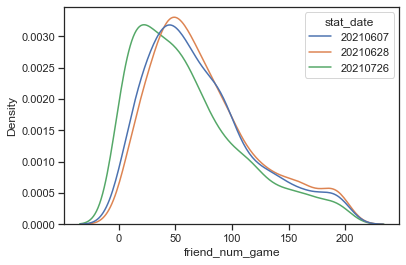

In [88]:
for feature in ["skin_num", "login_days", "friend_num_plat", "friend_num_game"]:
    sns.kdeplot(data = pd.concat([steal_account_by_dates[i].loc[shared_uid_cluster] for i in [0,3,7]]), x = feature, hue = "stat_date")
    plt.savefig("kde_comparison_cluster_" + feature + ".png")
    plt.show()